## Activity 2: K-nn classification with credit data

This data is similar to the class activity and also the one described in the text book Doing Data Science Chapter 3 for K-nn. Repeat it for the German Data given in UbBox [2]. 

Tabulate your results for various K. Also try it for various sizes for test and training set (20-80%, 30-70%, etc.) Get gata from Kaggle or from here: https://buffalo.box.com/s/jm1hki9hbnlm4kzfkaimkzilys3dm8dg


### Reading and cleaning the data to get a usable dataset

In [1]:
#Read the data set from the csv file

df <- read.csv("lab3Data/german_credit_data1.csv")
head(df)

X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks
0,67,male,2,own,NA,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NA,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
5,35,male,1,free,NA,NA,9055,36,education,1


In [2]:
# Analyzing the structure of the data

str(df)

'data.frame':	1000 obs. of  11 variables:
 $ X.              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Age             : int  67 22 49 45 53 35 53 35 61 28 ...
 $ Sex             : Factor w/ 2 levels "female","male": 2 1 2 2 2 2 2 2 2 2 ...
 $ Job             : int  2 2 1 2 2 1 2 3 1 3 ...
 $ Housing         : Factor w/ 3 levels "free","own","rent": 2 2 2 1 1 1 2 3 2 2 ...
 $ Saving.accounts : Factor w/ 4 levels "little","moderate",..: NA 1 1 1 1 NA 3 1 4 1 ...
 $ Checking.account: Factor w/ 3 levels "little","moderate",..: 1 2 NA 1 1 NA NA 2 NA 2 ...
 $ Credit.amount   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Duration        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Purpose         : Factor w/ 8 levels "business","car",..: 6 6 4 5 2 4 5 2 6 2 ...
 $ Credit.Risks    : int  1 2 1 1 2 1 1 1 1 2 ...


In [3]:
#Summarizing the different values in the table

summary(df)

       X.             Age            Sex           Job        Housing   
 Min.   :  0.0   Min.   :19.00   female:310   Min.   :0.000   free:108  
 1st Qu.:249.8   1st Qu.:27.00   male  :690   1st Qu.:2.000   own :713  
 Median :499.5   Median :33.00                Median :2.000   rent:179  
 Mean   :499.5   Mean   :35.55                Mean   :1.904             
 3rd Qu.:749.2   3rd Qu.:42.00                3rd Qu.:2.000             
 Max.   :999.0   Max.   :75.00                Max.   :3.000             
                                                                        
   Saving.accounts Checking.account Credit.amount      Duration   
 little    :603    little  :274     Min.   :  250   Min.   : 4.0  
 moderate  :103    moderate:269     1st Qu.: 1366   1st Qu.:12.0  
 quite rich: 63    rich    : 63     Median : 2320   Median :18.0  
 rich      : 48    NA's    :394     Mean   : 3271   Mean   :20.9  
 NA's      :183                     3rd Qu.: 3972   3rd Qu.:24.0  
              

In [4]:
# Omitting the rows containing NA values from the data to get a clean data

new_df <- na.omit(df)
str(new_df)

'data.frame':	522 obs. of  11 variables:
 $ X.              : int  1 3 4 7 9 10 11 12 13 14 ...
 $ Age             : int  22 45 53 35 28 25 24 22 60 28 ...
 $ Sex             : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ Job             : int  2 2 2 3 3 2 2 2 1 2 ...
 $ Housing         : Factor w/ 3 levels "free","own","rent": 2 1 1 3 2 3 3 2 2 3 ...
 $ Saving.accounts : Factor w/ 4 levels "little","moderate",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Checking.account: Factor w/ 3 levels "little","moderate",..: 2 1 1 2 2 2 1 2 1 1 ...
 $ Credit.amount   : int  5951 7882 4870 6948 5234 1295 4308 1567 1199 1403 ...
 $ Duration        : int  48 42 24 36 30 12 48 12 24 15 ...
 $ Purpose         : Factor w/ 8 levels "business","car",..: 6 5 2 2 2 2 1 6 2 2 ...
 $ Credit.Risks    : int  2 1 2 1 2 2 2 1 2 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:478] 1 3 6 7 9 17 18 20 21 25 ...
  .. ..- attr(*, "names")= chr [1:478] "1" "3" "6" "7" ...


### Converting the Factored columns - Age, Sex, Savings Account, Checking Account and Purpose to their Integer forms so that they can be used for classification

In [5]:
#Converting Sex data to numeric

levels(new_df$Sex) <- c('1', '2')
new_df$Sex <- as.numeric(as.character(new_df$Sex))


In [6]:
#Converting Savings.account data to numeric

levels(new_df$Saving.accounts) <- c('1', '2', '3', '4')
new_df$Saving.accounts <- as.numeric(as.character(new_df$Saving.accounts))


In [7]:
#Converting Checking.account data to numeric

levels(new_df$Checking.account) <- c('1', '2', '3')
new_df$Checking.account <- as.numeric(as.character(new_df$Checking.account))


In [8]:
#Converting Housing data to numeric

levels(new_df$Housing) <- c('1', '2', '3')
new_df$Housing <- as.numeric(as.character(new_df$Housing))

In [9]:
#Converting Purpose data to numeric

levels(new_df$Purpose) <- c('1', '2', '3', '4', '5', '6', '7', '8')
new_df$Purpose <- as.numeric(as.character(new_df$Purpose))

In [10]:
str(new_df)

'data.frame':	522 obs. of  11 variables:
 $ X.              : int  1 3 4 7 9 10 11 12 13 14 ...
 $ Age             : int  22 45 53 35 28 25 24 22 60 28 ...
 $ Sex             : num  1 2 2 2 2 1 1 1 2 1 ...
 $ Job             : int  2 2 2 3 3 2 2 2 1 2 ...
 $ Housing         : num  2 1 1 3 2 3 3 2 2 3 ...
 $ Saving.accounts : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Checking.account: num  2 1 1 2 2 2 1 2 1 1 ...
 $ Credit.amount   : int  5951 7882 4870 6948 5234 1295 4308 1567 1199 1403 ...
 $ Duration        : int  48 42 24 36 30 12 48 12 24 15 ...
 $ Purpose         : num  6 5 2 2 2 2 1 6 2 2 ...
 $ Credit.Risks    : int  2 1 2 1 2 2 2 1 2 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:478] 1 3 6 7 9 17 18 20 21 25 ...
  .. ..- attr(*, "names")= chr [1:478] "1" "3" "6" "7" ...


### Normalizing the data set so that all the columns have similar range of values

In [11]:
# Scale() function can be used to normalize the data

df_n <- scale(new_df)

In [12]:
# Taking summary of the data to check the values after normalization

summary(df_n)

       X.                Age               Sex               Job         
 Min.   :-1.69176   Min.   :-1.3479   Min.   :-1.4502   Min.   :-2.7467  
 1st Qu.:-0.89315   1st Qu.:-0.7541   1st Qu.:-1.4502   1st Qu.: 0.1824  
 Median : 0.03084   Median :-0.2875   Median : 0.6882   Median : 0.1824  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.83546   3rd Qu.: 0.5184   3rd Qu.: 0.6882   3rd Qu.: 0.1824  
 Max.   : 1.73625   Max.   : 3.4027   Max.   : 0.6882   Max.   : 1.6469  
    Housing        Saving.accounts   Checking.account  Credit.amount    
 Min.   :-1.8979   Min.   :-0.4507   Min.   :-0.9569   Min.   :-1.0251  
 1st Qu.:-0.1444   1st Qu.:-0.4507   1st Qu.:-0.9569   1st Qu.:-0.6764  
 Median :-0.1444   Median :-0.4507   Median : 0.5568   Median :-0.3251  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:-0.1444   3rd Qu.:-0.4507   3rd Qu.: 0.5568   3rd Qu.: 0.2364  
 Max.   : 1.6090   Max.   : 3.4922   Max.   

### Performing the model for Training Set = 90% and Test Set = 10%

In [13]:
#Sampling and dividing the data set into sets of 10% for testing and 90% for training. 

n.points <- nrow(df_n)
set.seed(100)
sampling.rate <- 0.9

In [14]:
# We need the number of points in the test set to calculate the misclassification rate

num.test.set.labels <- n.points * (1 - sampling.rate)

#### Separating the Training Set and True labels for it.

In [15]:
# Randomly sample which rows will go in the training set

training <- sample(1:n.points, sampling.rate * n.points, replace=FALSE)

In [16]:
# Define the training set to be those rows

df_train1 <- subset(df_n[training, ], select = c(Age:Purpose))
df_train1_target <- new_df$Credit.Risks[training]

#### Separating the Test Set and True labels for it.

In [17]:
# Selecting the remaining rows for test set

testing <- setdiff(1:n.points, training)

In [18]:
# define the test set to be the other rows

df_test1 <- subset(df_n[testing, ], select = c(Age:Purpose))
df_test1_target <- new_df$Credit.Risks[testing]

#### Applying kNN on the training and test sets to get the accuracy and misclassification

In [19]:
require(class)

Loading required package: class


In [20]:
accuracy <- rep(0, 20)
misclassification <- rep(0, 20)
k <- 1:20

for(x in k){
    prediction <- knn(train = df_train1, test = df_test1, cl = df_train1_target, k = x)
    accuracy[x] <- mean(df_test1_target == prediction)
    misclassification[x] <- 1- accuracy[x]
}

In [21]:
result1 <- as.data.frame(mapply(cbind, list(k, accuracy, misclassification)))
names(result1) <- c("k", "Train(90): Accuracy", "Train(90): Misclassification")
result1

k,Train(90): Accuracy,Train(90): Misclassification
1,0.4905660,0.5094340
2,0.5283019,0.4716981
3,0.5849057,0.4150943
4,0.5283019,0.4716981
5,0.5094340,0.4905660
6,0.5660377,0.4339623
7,0.4905660,0.5094340
8,0.5283019,0.4716981
9,0.5283019,0.4716981
10,0.5660377,0.4339623


In [22]:
min(result1$"Train(90): Misclassification")

[1] 0.3396226

### Performing the model for Training Set = 80% and Test Set = 20%

In [23]:
#Sampling and dividing the data set into sets of 20% for testing and 80% for training. 

n.points <- nrow(df_n)
set.seed(100)
sampling.rate <- 0.8

In [24]:
# We need the number of points in the test set to calculate the misclassification rate

num.test.set.labels <- n.points * (1 - sampling.rate)

#### Separating the Training Set and True labels for it.

In [25]:
# Randomly sample which rows will go in the training set

training <- sample(1:n.points, sampling.rate * n.points, replace=FALSE)

In [26]:
# Define the training set to be those rows

df_train2 <- subset(df_n[training, ], select = c(Age:Purpose))
df_train2_target <- new_df$Credit.Risks[training]

#### Separating the Test Set and True labels for it.

In [27]:
# Selecting the remaining rows for test set

testing <- setdiff(1:n.points, training)

In [28]:
# define the test set to be the other rows

df_test2 <- subset(df_n[testing, ], select = c(Age:Purpose))
df_test2_target <- new_df$Credit.Risks[testing]

#### Applying kNN on the training and test sets to get the accuracy and misclassification

In [29]:
require(class)

In [69]:
accuracy <- rep(0, 20)
misclassification <- rep(0, 20)
k <- 1:20

for(x in k){
    prediction <- knn(train = df_train2, test = df_test2, cl = df_train2_target, k = x)
    accuracy[x] <- mean(df_test2_target == prediction)
    misclassification[x] <- 1- accuracy[x]
}

In [70]:
result2 <- as.data.frame(mapply(cbind, list(k, accuracy, misclassification)))
names(result2) <- c("k", "Train(80): Accuracy", "Train(80): Misclassification")
result2

k,Train(80): Accuracy,Train(80): Misclassification
1,0.5523810,0.4476190
2,0.5714286,0.4285714
3,0.5904762,0.4095238
4,0.5619048,0.4380952
5,0.5904762,0.4095238
6,0.6000000,0.4000000
7,0.6190476,0.3809524
8,0.6190476,0.3809524
9,0.6095238,0.3904762
10,0.5714286,0.4285714


In [32]:
min(result2$"Train(80): Misclassification")

[1] 0.3047619

### Performing the model for Training Set = 70% and Test Set = 30%

In [33]:
#Sampling and dividing the data set into sets of 20% for testing and 80% for training. 

n.points <- nrow(df_n)
set.seed(100)
sampling.rate <- 0.8

In [34]:
# We need the number of points in the test set to calculate the misclassification rate

num.test.set.labels <- n.points * (1 - sampling.rate)

#### Separating the Training Set and True labels for it.

In [35]:
# Randomly sample which rows will go in the training set

training <- sample(1:n.points, sampling.rate * n.points, replace=FALSE)

In [36]:
# Define the training set to be those rows

df_train3 <- subset(df_n[training, ], select = c(Age:Purpose))
df_train3_target <- new_df$Credit.Risks[training]

#### Separating the Test Set and True labels for it.

In [37]:
# Selecting the remaining rows for test set

testing <- setdiff(1:n.points, training)

In [38]:
# define the test set to be the other rows

df_test3 <- subset(df_n[testing, ], select = c(Age:Purpose))
df_test3_target <- new_df$Credit.Risks[testing]

#### Applying kNN on the training and test sets to get the accuracy and misclassification

In [39]:
require(class)

In [40]:
accuracy <- rep(0, 20)
misclassification <- rep(0, 20)
k <- 1:20

for(x in k){
    prediction <- knn(train = df_train3, test = df_test3, cl = df_train3_target, k = x)
    accuracy[x] <- mean(df_test3_target == prediction)
    misclassification[x] <- 1- accuracy[x]
}

In [41]:
result3 <- as.data.frame(mapply(cbind, list(k, accuracy, misclassification)))
names(result3) <- c("k", "Train(70): Accuracy", "Train(70): Misclassification")
result3

k,Train(70): Accuracy,Train(70): Misclassification
1,0.5523810,0.4476190
2,0.5047619,0.4952381
3,0.5904762,0.4095238
4,0.5619048,0.4380952
5,0.5904762,0.4095238
6,0.6190476,0.3809524
7,0.6190476,0.3809524
8,0.6285714,0.3714286
9,0.6095238,0.3904762
10,0.6190476,0.3809524


In [42]:
min(result3$"Train(70): Misclassification")

[1] 0.3047619

### Performing the model for Training Set = 60% and Test Set = 40%

In [43]:
#Sampling and dividing the data set into sets of 40% for testing and 60% for training. 

n.points <- nrow(df_n)
set.seed(100)
sampling.rate <- 0.6

In [44]:
# We need the number of points in the test set to calculate the misclassification rate

num.test.set.labels <- n.points * (1 - sampling.rate)

#### Separating the Training Set and True labels for it.

In [45]:
# Randomly sample which rows will go in the training set

training <- sample(1:n.points, sampling.rate * n.points, replace=FALSE)

In [46]:
# Define the training set to be those rows

df_train4 <- subset(df_n[training, ], select = c(Age:Purpose))
df_train4_target <- new_df$Credit.Risks[training]

#### Separating the Test Set and True labels for it.

In [47]:
# Selecting the remaining rows for test set

testing <- setdiff(1:n.points, training)

In [48]:
# define the test set to be the other rows

df_test4 <- subset(df_n[testing, ], select = c(Age:Purpose))
df_test4_target <- new_df$Credit.Risks[testing]

#### Applying kNN on the training and test sets to get the accuracy and misclassification

In [49]:
require(class)

In [50]:
accuracy <- rep(0, 20)
misclassification <- rep(0, 20)
k <- 1:20

for(x in k){
    prediction <- knn(train = df_train4, test = df_test4, cl = df_train4_target, k = x)
    accuracy[x] <- mean(df_test4_target == prediction)
    misclassification[x] <- 1- accuracy[x]
}

In [51]:
result4 <- as.data.frame(mapply(cbind, list(k, accuracy, misclassification)))
names(result4) <- c("k", "Train(60): Accuracy", "Train(60): Misclassification")
result4

k,Train(60): Accuracy,Train(60): Misclassification
1,0.5980861,0.4019139
2,0.6363636,0.3636364
3,0.6124402,0.3875598
4,0.5885167,0.4114833
5,0.6267943,0.3732057
6,0.5980861,0.4019139
7,0.5933014,0.4066986
8,0.5885167,0.4114833
9,0.6076555,0.3923445
10,0.6220096,0.3779904


In [52]:
min(result4$"Train(60): Misclassification")

[1] 0.3349282

### Performing the model for Training Set = 50% and Test Set = 50%

In [53]:
#Sampling and dividing the data set into sets of 50% for testing and 50% for training. 

n.points <- nrow(df_n)
set.seed(100)
sampling.rate <- 0.5

In [54]:
# We need the number of points in the test set to calculate the misclassification rate

num.test.set.labels <- n.points * (1 - sampling.rate)

#### Separating the Training Set and True labels for it.

In [55]:
# Randomly sample which rows will go in the training set

training <- sample(1:n.points, sampling.rate * n.points, replace=FALSE)

In [56]:
# Define the training set to be those rows

df_train5 <- subset(df_n[training, ], select = c(Age:Purpose))
df_train5_target <- new_df$Credit.Risks[training]

#### Separating the Test Set and True labels for it.

In [57]:
# Selecting the remaining rows for test set

testing <- setdiff(1:n.points, training)

In [58]:
# define the test set to be the other rows

df_test5 <- subset(df_n[testing, ], select = c(Age:Purpose))
df_test5_target <- new_df$Credit.Risks[testing]

#### Applying kNN on the training and test sets to get the accuracy and misclassification

In [59]:
require(class)

In [60]:
accuracy <- rep(0, 20)
misclassification <- rep(0, 20)
k <- 1:20

for(x in k){
    prediction <- knn(train = df_train5, test = df_test5, cl = df_train5_target, k = x)
    accuracy[x] <- mean(df_test5_target == prediction)
    misclassification[x] <- 1- accuracy[x]
}

In [61]:
result5 <- as.data.frame(mapply(cbind, list(k, accuracy, misclassification)))
names(result5) <- c("k", "Train(50): Accuracy", "Train(50): Misclassification")
result5

k,Train(50): Accuracy,Train(50): Misclassification
1,0.5938697,0.4061303
2,0.5900383,0.4099617
3,0.6015326,0.3984674
4,0.5785441,0.4214559
5,0.6091954,0.3908046
6,0.6015326,0.3984674
7,0.5747126,0.4252874
8,0.6168582,0.3831418
9,0.6168582,0.3831418
10,0.6091954,0.3908046


In [62]:
min(result5$"Train(50): Misclassification")

[1] 0.3371648

### Merging all the result sets

In [63]:
results <- merge(result1, result2, by = "k")
results <- merge(results, result3, by = "k")
results <- merge(results, result4, by = "k")
results <- merge(results, result5, by = "k")

In [64]:
results

k,Train(90): Accuracy,Train(90): Misclassification,Train(80): Accuracy,Train(80): Misclassification,Train(70): Accuracy,Train(70): Misclassification,Train(60): Accuracy,Train(60): Misclassification,Train(50): Accuracy,Train(50): Misclassification
1,0.4905660,0.5094340,0.5523810,0.4476190,0.5523810,0.4476190,0.5980861,0.4019139,0.5938697,0.4061303
2,0.5283019,0.4716981,0.5047619,0.4952381,0.5047619,0.4952381,0.6363636,0.3636364,0.5900383,0.4099617
3,0.5849057,0.4150943,0.5904762,0.4095238,0.5904762,0.4095238,0.6124402,0.3875598,0.6015326,0.3984674
4,0.5283019,0.4716981,0.5619048,0.4380952,0.5619048,0.4380952,0.5885167,0.4114833,0.5785441,0.4214559
5,0.5094340,0.4905660,0.5904762,0.4095238,0.5904762,0.4095238,0.6267943,0.3732057,0.6091954,0.3908046
6,0.5660377,0.4339623,0.6190476,0.3809524,0.6190476,0.3809524,0.5980861,0.4019139,0.6015326,0.3984674
7,0.4905660,0.5094340,0.6190476,0.3809524,0.6190476,0.3809524,0.5933014,0.4066986,0.5747126,0.4252874
8,0.5283019,0.4716981,0.6285714,0.3714286,0.6285714,0.3714286,0.5885167,0.4114833,0.6168582,0.3831418
9,0.5283019,0.4716981,0.6095238,0.3904762,0.6095238,0.3904762,0.6076555,0.3923445,0.6168582,0.3831418
10,0.5660377,0.4339623,0.6190476,0.3809524,0.6190476,0.3809524,0.6220096,0.3779904,0.6091954,0.3908046


In [65]:
min(results$"Train(90): Misclassification")
min(results$"Train(80): Misclassification")
min(results$"Train(70): Misclassification")
min(results$"Train(60): Misclassification")
min(results$"Train(50): Misclassification")

[1] 0.3396226

[1] 0.3047619

[1] 0.3047619

[1] 0.3349282

[1] 0.3371648

#### Thus minimum misclassification is 0.305, achieved for training set as 80% and 70% for a k value of 20.

### Plottng a graph for Misclassification for different divisions of training sets

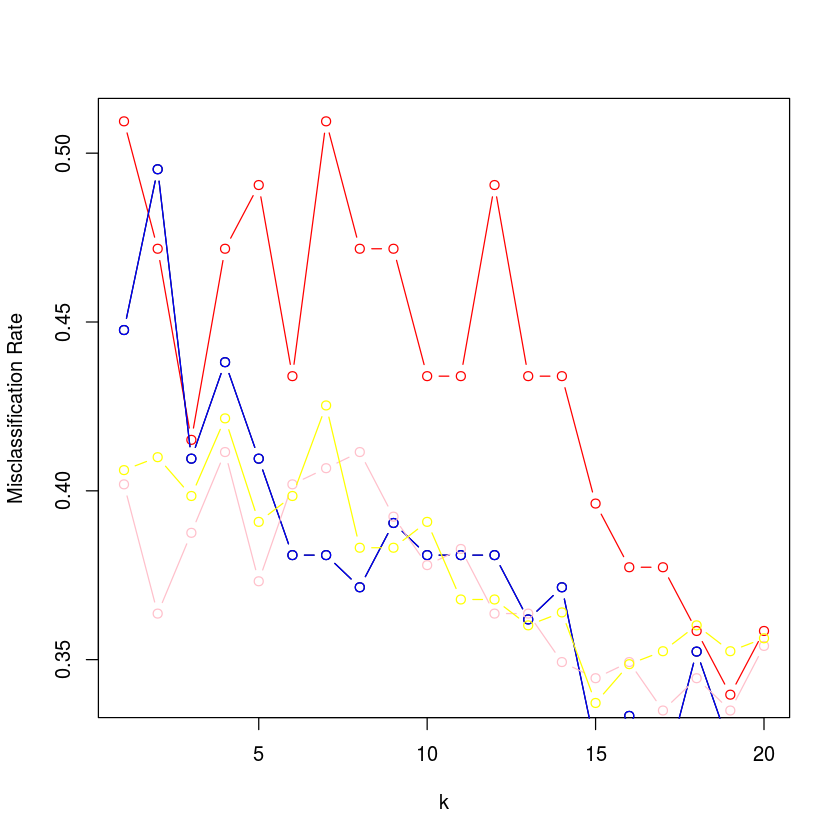

In [66]:
plot(results$k, results$"Train(90): Misclassification", type = 'b', xlab = 'k', ylab = 'Misclassification Rate', col="red")
lines(results$k, results$"Train(80): Misclassification",col="black", type = 'b')
lines(results$k, results$"Train(70): Misclassification",col="blue", type = 'b')
lines(results$k, results$"Train(60): Misclassification",col="pink", type = 'b')
lines(results$k, results$"Train(50): Misclassification",col="yellow", type = 'b')


### References:

[1] Doing Data Science Book, Chapter 2, Pg - 71-81

[2] https://www.r-bloggers.com/using-knn-classifier-to-predict-whether-the-price-of-stock-will-increase/